In [3]:
# Final Variablen
API_KEY_SPOONACULAR = "146fe79a630b4afb8306a2985bedc64c"
API_KEY_REDDIT = "KAJ2xGzCOlH3hyTRADNdSBDuTBORvw"
API_CLIENTID_REDDIT = "tSemvcUBRFCTYQ"

USERNAME_REDDIT = "Short-Arrival7632"
PW_REDDIT = "cookies123"

In [83]:
# KONFIGURATION

LIMIT_REDDIT_POSTS = 10
LIMIT_SPOONACULAR_RECIPES = 5

In [ ]:
# Auf Windows ausführen (einmalig)
!pip install praw
!pip install pandas
!pip install matplotlib

In [ ]:
# Auf Linux ausführen (einmalig)
!pip3 install praw
!pip3 install pandas
!pip3 install matplotlib

In [1]:
import praw
import pandas as pd
from datetime import datetime
import requests
import json
import matplotlib.pyplot as plt

### Get subreddit data

In [5]:
reddit = praw.Reddit(client_id = API_CLIENTID_REDDIT,
                    client_secret = API_KEY_REDDIT,
                    username= USERNAME_REDDIT,
                    password = PW_REDDIT,
                    user_agent = "food_dashboard_v01")

sr = reddit.subreddit("food")

In [47]:
# retrieve new posts
new_posts = sr.hot(limit=LIMIT_REDDIT_POSTS)

In [48]:
# clean data 
new_posts_lst = []
for post in new_posts:
    timestamp_created = post.created
    time_created = datetime.fromtimestamp(timestamp_created).strftime("%I:%M:%S")
    day_created = datetime.fromtimestamp(timestamp_created).strftime("%Y-%m-%d")
    hour_created = datetime.fromtimestamp(timestamp_created).strftime("%I")
    
    # created time, created day, author, title, likes, downs, num_comments, text, thumbnail, url
    x = [hour_created, time_created, day_created, post.author, post.title, post.ups, post.downs, post.num_comments, post.selftext, post.thumbnail, post.url]
    new_posts_lst.append(x)

In [49]:
# create DataFrame
df = pd.DataFrame(data=new_posts_lst, columns=["hour_created", "created_time", "created_day", "author", "title", "likes", "downs", "num_comments", "text", "thumbnail", "url"])

In [50]:
df.head()

,hour_created,created_time,created_day,author,title,likes,downs,num_comments,text,thumbnail,url
0,06,06:49:38,2021-02-07,aka_scoch,[homemade] raspberry cream cake covered in Legos,9408,0,239,,https://b.thumbs.redditmedia.com/ql-XfyeTNstPp...,https://i.redd.it/dz168i5x11g61.jpg
1,06,06:16:20,2021-02-07,Domates93,[Homemade] Crispy nacho chicken fingers and wings,410,0,16,,https://b.thumbs.redditmedia.com/_lQTbGH3thcyG...,https://i.redd.it/y017b6pzv0g61.jpg
2,02,02:48:34,2021-02-07,boomerangrunner,[Homemade] CrunchWrap with marinated chicken a...,747,0,27,,https://b.thumbs.redditmedia.com/haFeqWtL1_0HI...,https://i.redd.it/8snxiz3xuzf61.jpg
3,12,12:05:54,2021-02-07,KungPowChicken23,[Homemade] Blueberry and Blackberry Ricotta Wa...,15174,0,236,,https://b.thumbs.redditmedia.com/f6dSxrODdU6oq...,https://i.redd.it/gcrrdhyfhvf61.jpg
4,07,07:38:59,2021-02-07,mienczaczek,[Homemade] Kapuśniaczki - Polish Sauerkraut & ...,181,0,12,,https://b.thumbs.redditmedia.com/LAS6qMMmwb6Pb...,https://i.redd.it/gzd05xvka1g61.jpg


In [51]:
x = df["hour_created"].value_counts()
k = x.values
i = x.index

In [52]:
df.head()

,hour_created,created_time,created_day,author,title,likes,downs,num_comments,text,thumbnail,url
0,06,06:49:38,2021-02-07,aka_scoch,[homemade] raspberry cream cake covered in Legos,9408,0,239,,https://b.thumbs.redditmedia.com/ql-XfyeTNstPp...,https://i.redd.it/dz168i5x11g61.jpg
1,06,06:16:20,2021-02-07,Domates93,[Homemade] Crispy nacho chicken fingers and wings,410,0,16,,https://b.thumbs.redditmedia.com/_lQTbGH3thcyG...,https://i.redd.it/y017b6pzv0g61.jpg
2,02,02:48:34,2021-02-07,boomerangrunner,[Homemade] CrunchWrap with marinated chicken a...,747,0,27,,https://b.thumbs.redditmedia.com/haFeqWtL1_0HI...,https://i.redd.it/8snxiz3xuzf61.jpg
3,12,12:05:54,2021-02-07,KungPowChicken23,[Homemade] Blueberry and Blackberry Ricotta Wa...,15174,0,236,,https://b.thumbs.redditmedia.com/f6dSxrODdU6oq...,https://i.redd.it/gcrrdhyfhvf61.jpg
4,07,07:38:59,2021-02-07,mienczaczek,[Homemade] Kapuśniaczki - Polish Sauerkraut & ...,181,0,12,,https://b.thumbs.redditmedia.com/LAS6qMMmwb6Pb...,https://i.redd.it/gzd05xvka1g61.jpg


<BarContainer object of 5 artists>

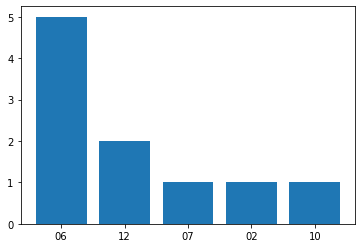

In [53]:
plt.bar(i, k)

In [54]:
df["cleaned_text"] = df["title"].apply(str.lower)

In [94]:
def delete_homemade(text):
    new_text = ""
    old_text = text.split()
    for word in old_text:
        if word[0] != "[":
            new_text = new_text + "," + word
    return new_text

In [56]:
df["cltext"] = df["cleaned_text"].apply(delete_homemade)

In [57]:
df.head()

,hour_created,created_time,created_day,author,title,likes,downs,num_comments,text,thumbnail,url,cleaned_text,cltext
0,06,06:49:38,2021-02-07,aka_scoch,[homemade] raspberry cream cake covered in Legos,9408,0,239,,https://b.thumbs.redditmedia.com/ql-XfyeTNstPp...,https://i.redd.it/dz168i5x11g61.jpg,[homemade] raspberry cream cake covered in legos,raspberry cream cake covered in legos
1,06,06:16:20,2021-02-07,Domates93,[Homemade] Crispy nacho chicken fingers and wings,410,0,16,,https://b.thumbs.redditmedia.com/_lQTbGH3thcyG...,https://i.redd.it/y017b6pzv0g61.jpg,[homemade] crispy nacho chicken fingers and wings,crispy nacho chicken fingers and wings
2,02,02:48:34,2021-02-07,boomerangrunner,[Homemade] CrunchWrap with marinated chicken a...,747,0,27,,https://b.thumbs.redditmedia.com/haFeqWtL1_0HI...,https://i.redd.it/8snxiz3xuzf61.jpg,[homemade] crunchwrap with marinated chicken a...,crunchwrap with marinated chicken and habaner...
3,12,12:05:54,2021-02-07,KungPowChicken23,[Homemade] Blueberry and Blackberry Ricotta Wa...,15174,0,236,,https://b.thumbs.redditmedia.com/f6dSxrODdU6oq...,https://i.redd.it/gcrrdhyfhvf61.jpg,[homemade] blueberry and blackberry ricotta wa...,blueberry and blackberry ricotta waffles with...
4,07,07:38:59,2021-02-07,mienczaczek,[Homemade] Kapuśniaczki - Polish Sauerkraut & ...,181,0,12,,https://b.thumbs.redditmedia.com/LAS6qMMmwb6Pb...,https://i.redd.it/gzd05xvka1g61.jpg,[homemade] kapuśniaczki - polish sauerkraut & ...,kapuśniaczki - polish sauerkraut & mushroom p...


In [76]:
def getRecipe(suchwort):
    req_url = "https://api.spoonacular.com/recipes/complexSearch?apiKey=" + API_KEY_SPOONACULAR + "&query=" + suchwort + "&number=" + str(LIMIT_SPOONACULAR_RECIPES) + "&addRecipeNutrition=TRUE"
    resp = requests.get(req_url)
    jresp = json.loads(resp.text)
    all_recipes = []
    for recipe in jresp["results"]:
        rlist = [recipe["vegetarian"], 
        recipe["vegan"],
        recipe["glutenFree"],
        recipe["dairyFree"],
        recipe["aggregateLikes"],
        recipe["readyInMinutes"],
        recipe["spoonacularSourceUrl"]]
        
        nutrients = recipe["nutrition"]["nutrients"]
        ingredients = recipe["nutrition"]["ingredients"]
        
        
        for nutrient in nutrients:
            # Calories, Sugar, Fat, Carbohydrates
            # name, amount, unit
            itemList = ["Calories", "Sugar", "Fat"]
            if nutrient["name"] in itemList:
                rlist.append(nutrient["amount"])
                
        ilist = []
        for ingredient in ingredients:
            # name
            ilist.append(ingredient["name"])
        rlist.append(ilist)

        all_recipes.append(rlist)
    return all_recipes
    

In [95]:
x = getRecipe("raspberry")

In [96]:
x

[[True,
  False,
  False,
  False,
  4,
  45,
  'https://spoonacular.com/raspberry-sliced-657899',
  210.84,
  10.86,
  11.34,
  ['raspberries',
   'butter',
   'sugar',
   'eggs',
   'lemon juice',
   'lemon zest',
   'vanilla extract',
   'sour cream',
   'plain flour',
   'baking powder',
   'salt',
   'milk']],
 [True,
  False,
  False,
  False,
  1,
  45,
  'https://spoonacular.com/raspberry-peach-crisp-657889',
  163.6,
  5.17,
  16.4,
  ['peach',
   'sugar',
   'quick cooking tapioca',
   'raspberry preserves',
   'quick cooking oats',
   'flour',
   'brown sugar',
   'cinnamon',
   'butter']],
 [False,
  False,
  False,
  False,
  1,
  45,
  'https://spoonacular.com/raspberry-truffle-cake-657912',
  471.03,
  28.29,
  34.58,
  ['semi-sweet chocolate',
   'butter',
   'sugar',
   'flour',
   'raspberry liqueur',
   'eggs',
   'raspberry jam']],
 [True,
  False,
  False,
  False,
  1,
  45,
  'https://spoonacular.com/raspberry-jam-swirled-buns-657875',
  187.02,
  6.5,
  8.42,
  

### Get random recipes from spoonacular

In [62]:
req_url = "https://api.spoonacular.com/recipes/random?apiKey=" + API_KEY_SPOONACULAR + "&number=" + str(LIMIT_SPOONACULAR_RECIPES) + "&addRecipeNutrition=TRUE"

In [59]:
resp = requests.get(req_url)
jresp = json.loads(resp.text)

In [60]:
for recipe in jresp["recipes"]:
    print(recipe)
    break
    print(recipe["aggregateLikes"])
    print(recipe["spoonacularSourceUrl"])

{'vegetarian': False, 'vegan': False, 'glutenFree': True, 'dairyFree': True, 'veryHealthy': False, 'cheap': False, 'veryPopular': False, 'sustainable': False, 'weightWatcherSmartPoints': 52, 'gaps': 'no', 'lowFodmap': False, 'aggregateLikes': 6, 'spoonacularScore': 23.0, 'healthScore': 2.0, 'creditsText': 'Foodista.com – The Cooking Encyclopedia Everyone Can Edit', 'license': 'CC BY 3.0', 'sourceName': 'Foodista', 'pricePerServing': 397.34, 'extendedIngredients': [{'id': 1124, 'aisle': 'Milk, Eggs, Other Dairy', 'image': 'egg-white.jpg', 'consistency': 'solid', 'name': 'egg white', 'original': '1 large egg white', 'originalString': '1 large egg white', 'originalName': 'egg white', 'amount': 1.0, 'unit': 'large', 'meta': [], 'metaInformation': [], 'measures': {'us': {'amount': 1.0, 'unitShort': 'large', 'unitLong': 'large'}, 'metric': {'amount': 1.0, 'unitShort': 'large', 'unitLong': 'large'}}}, {'id': 93752, 'aisle': 'Ethnic Foods', 'image': 'ginger-juice.jpg', 'consistency': 'solid', 